In [1]:
# Import relevant packages
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors

In [34]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size' : 10}) 
plt.rcParams.update({'ytick.major.size' : 10}) 
plt.rcParams.update({'xtick.minor.size' : 5}) 
plt.rcParams.update({'ytick.minor.size' : 5}) 
plt.rcParams.update({'axes.labelsize' : "large"}) 

In [25]:
f=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_hitsNoBIB.root")

In [26]:
print(f.keys())

['tracks_tree;1']


In [27]:
tree=f["tracks_tree"]

In [29]:
print(tree.keys())

['x', 'y', 'z', 't', 'barOrEnd', 'location', 'module', 'layer', 'side']


In [13]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [14]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

# Investigating the meaning of out different keys

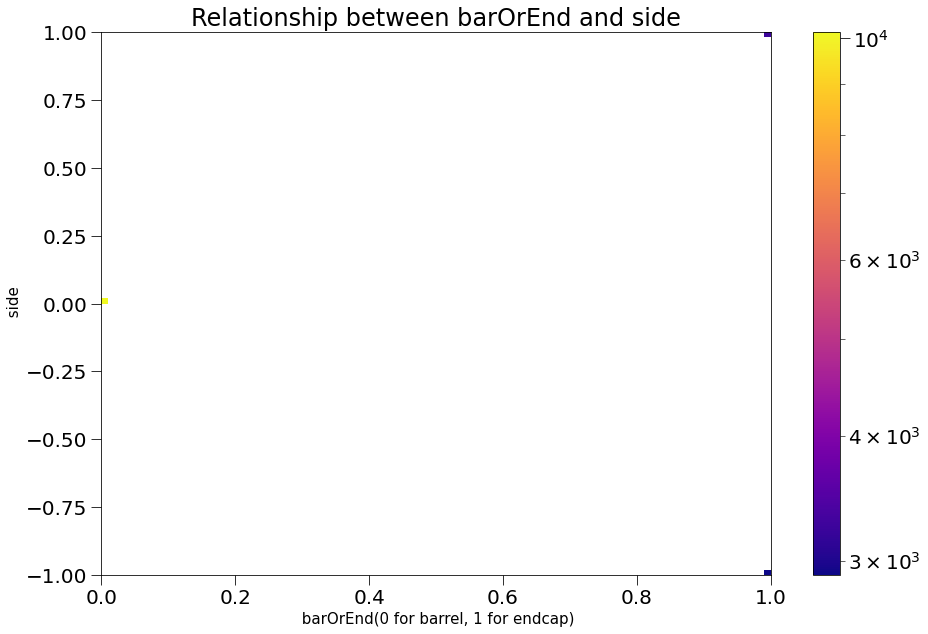

In [35]:
plot2DHistogram(tree["barOrEnd"].array(), tree["side"].array(), label=("Relationship between barOrEnd and side; barOrEnd(0 for barrel, 1 for endcap); side"))

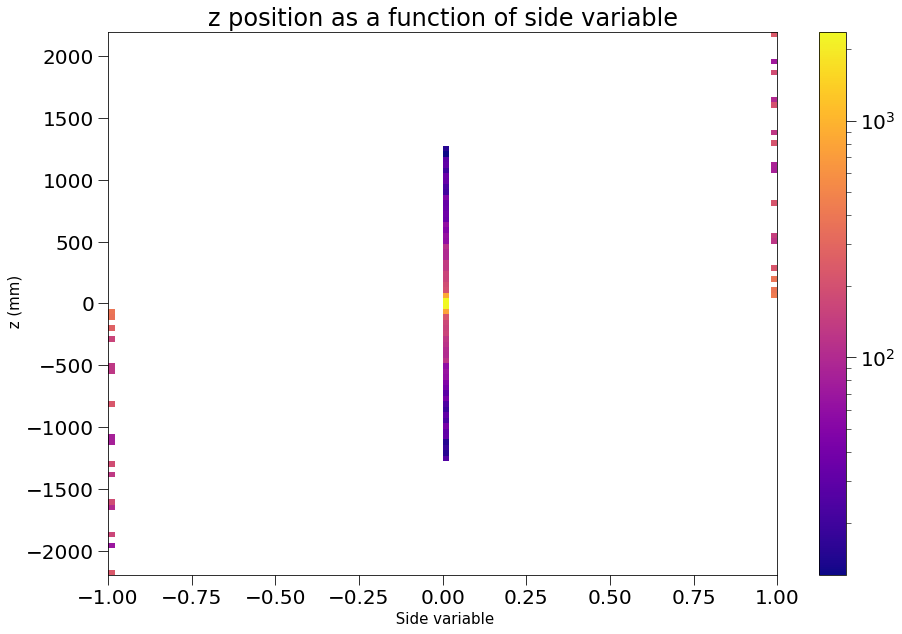

In [39]:
plot2DHistogram(tree["side"], tree["z"], label="z position as a function of side variable; Side variable; z (mm)")

#### barOrEnd was coded to be a 0 if reading a collection that was named "\*BarrelCollection" and a 1 if reading "\*EndcapCollection". Therefore the top graph shows side=0 is equivilent to the hit being in the barrel, while side=1,-1 is equivilent to the hit being on the endcap.
#### The second graph shows that side=1 marks all the hits on endcaps with a positive z and side=-1 marks all the hits on endcaps with a negative z

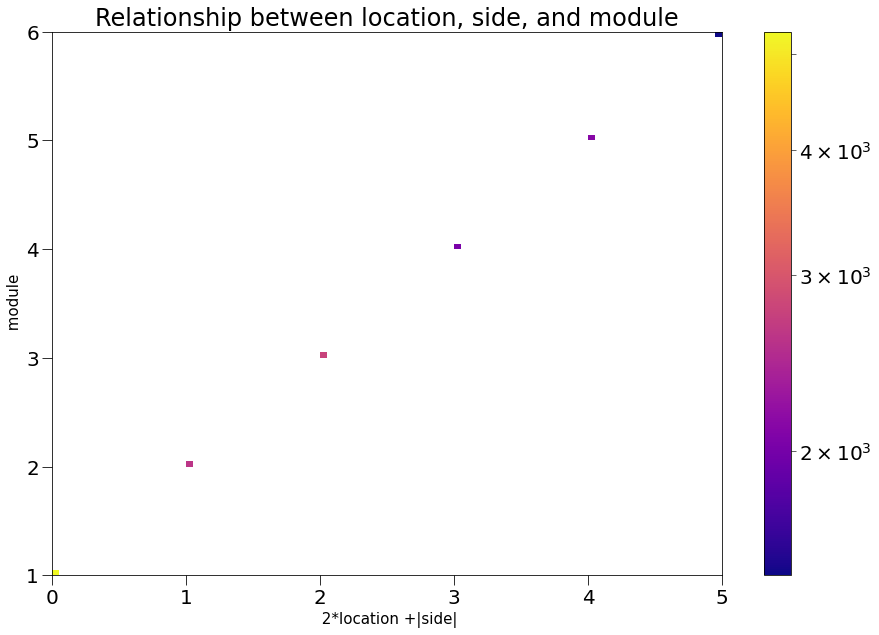

In [41]:
plot2DHistogram(2*tree["location"].array()+np.abs(tree["side"].array()), tree["module"].array(), label="Relationship between location, side, and module; 2*location +|side|; module")

#### I coded location to read 0 if the hit was in the vertex, 1 if the hit was in the inner detector and 2 if the hit was in the outer detector. The above graph shows that module uniquely determines both the detector and if its on the barrel or endcap by assigning each hit 2 times my value for location and then adding 1 if its on the barrel and 2 if its on an endcap.

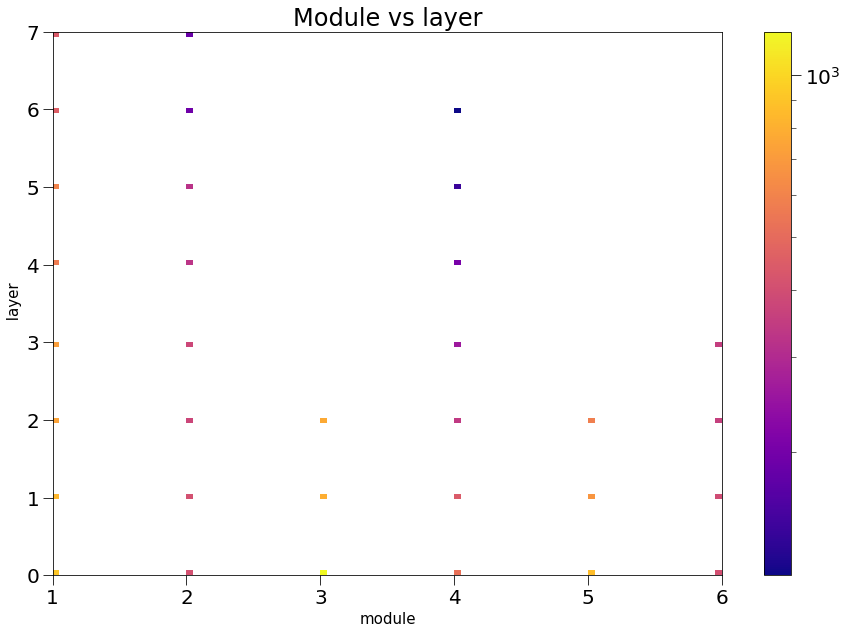

In [58]:
plot2DHistogram(tree["module"].array(),tree["layer"].array(), label="Module vs layer;module; layer")

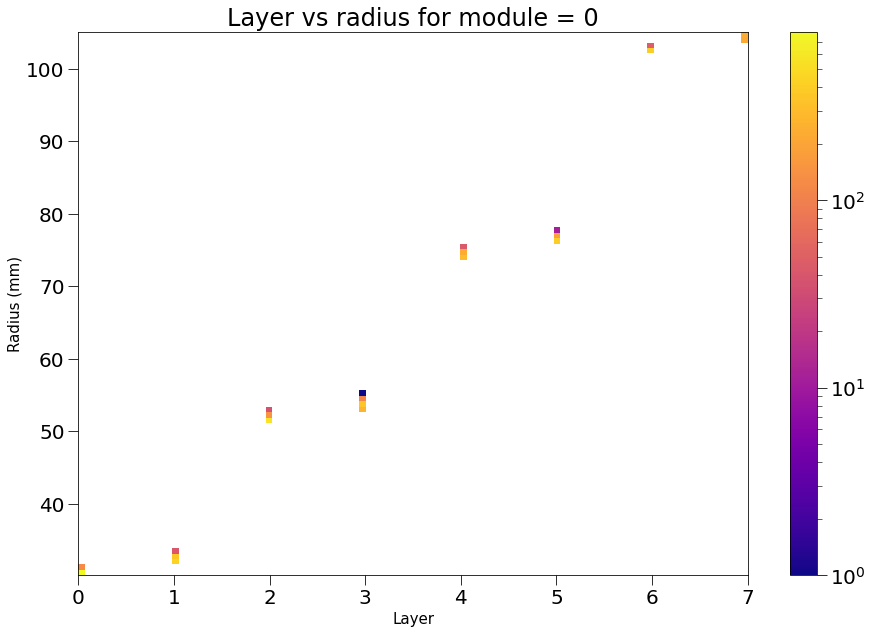

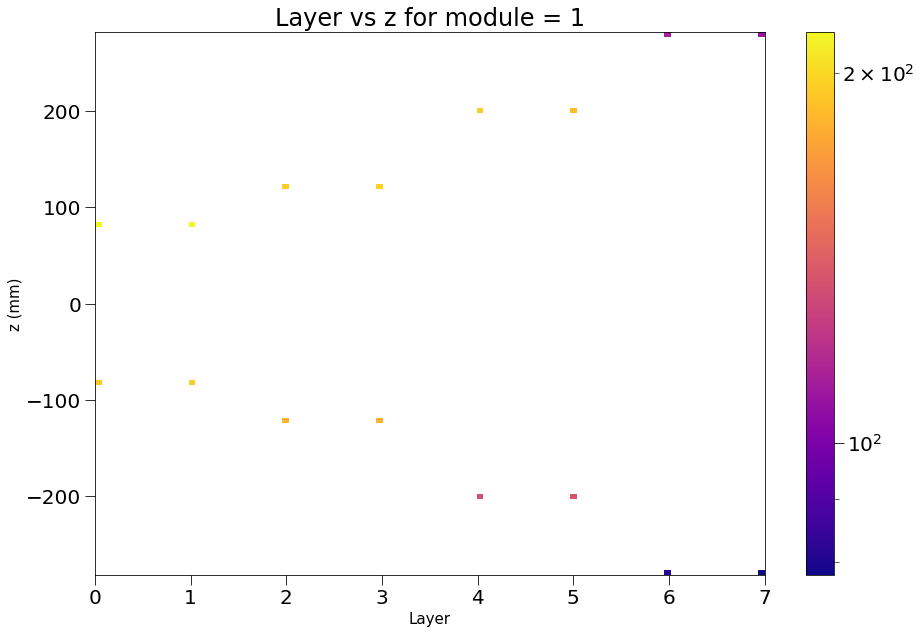

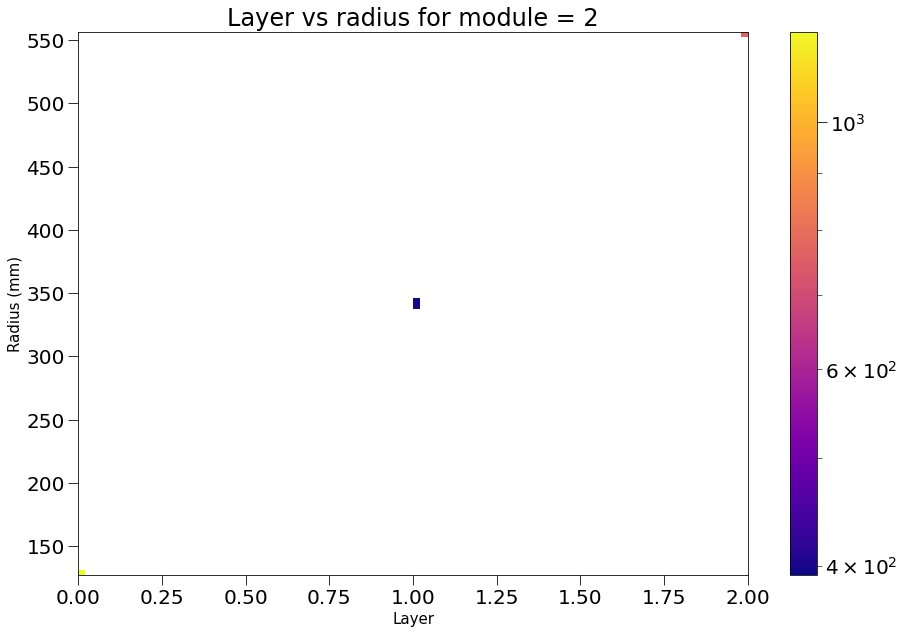

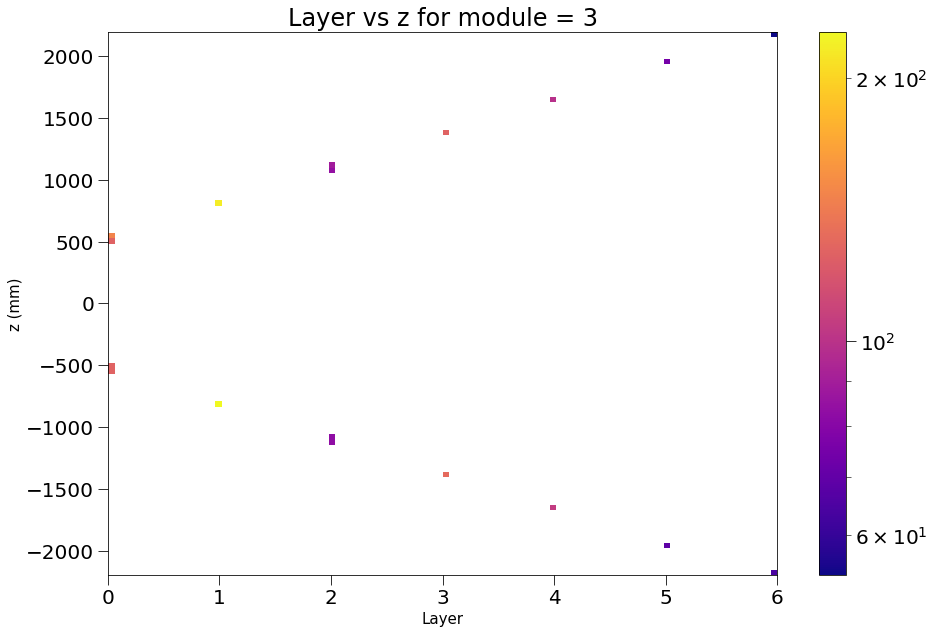

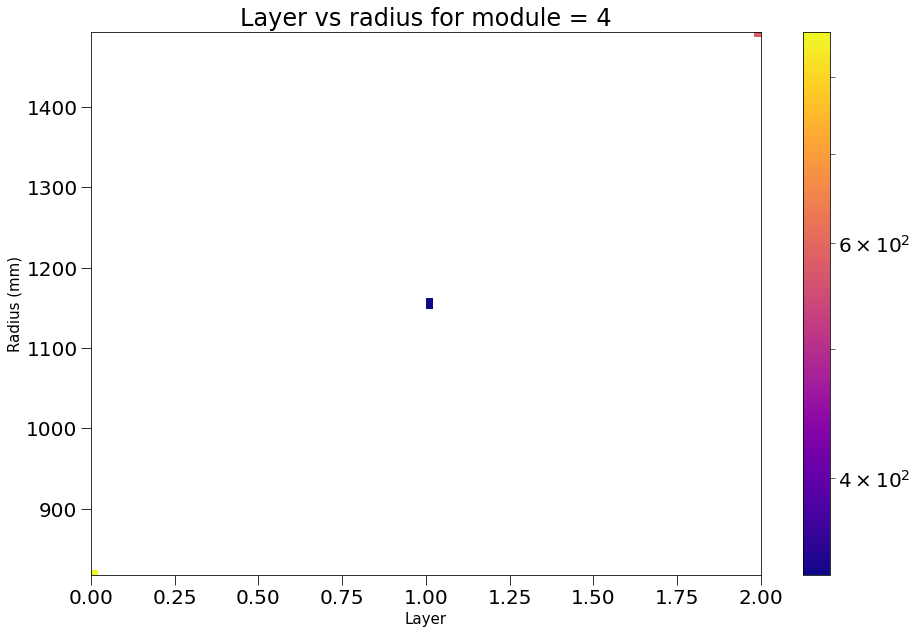

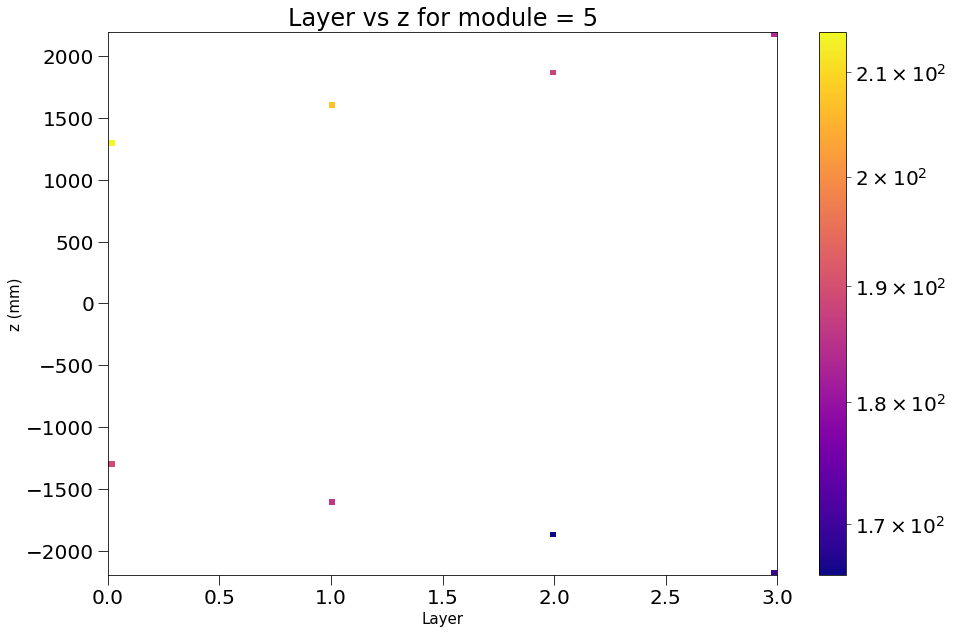

In [57]:
for i in range(6):
    inMod=(tree["module"].array()==(i+1))
    if i %2==0:
        plot2DHistogram(tree["layer"].array()[inMod], np.sqrt(tree["x"].array()[inMod]**2+tree["y"].array()[inMod]**2), bins=100, label=("Layer vs radius for module = "+str(i)+";Layer;Radius (mm)"))
    else:
        plot2DHistogram(tree["layer"].array()[inMod], tree["z"].array()[inMod], bins=100, label=("Layer vs z for module = "+str(i)+";Layer;z (mm)"))

#### The above two graphs show that for each module value, the layer value coorespondes to the individual layers of the detector. Specifically layer=0 being the inner most layer, layer=1 being the second inner most layer, etc.